# Appendix y-rotate

## Dataset

### Load

In [1]:
import pandas as pd
from IPython.display import display

Load data that we generated with the _Juqbox.jl_ pulse optimizer and different seeds. In this first set of experiments, we just do rotations on the x-axis of the Bloch (X-gate). Future works: different gates, different pulse optimizers, etc.

In [2]:
problem = 'yrotate_'

csv_files = [
    '../data/' + problem + 'seed_1.csv',
]
df_list = []
for f in csv_files:
    df_list.append(pd.read_csv(f, header=None))

In [3]:
print('Data set shapes:')
for i in range(len(csv_files)):
    print(csv_files[i], df_list[i].shape)

Data set shapes:
../data/yrotate_seed_1.csv (101, 21)


Remove some data that has been proven being "difficult".

**NOTE: An ORDERING in the data sets is assumed. Different data sets may have different ORDERING**.

For this specific dataset, elements in position 0 are _β = -pi_ and elements in position 50 is _β = 0_.

In [4]:
for i in range(len(csv_files)):
    # Remove row for beta=-pi (same alpha as beta=+pi)
    df_list[i].drop(0, inplace=True)
    # Remove row for beta=0
    df_list[i].drop(50, inplace=True)

Concatenate the data sets.

In [5]:
df = pd.concat(df_list)

In [6]:
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,-5.555530e-07,0.000032,0.000025,-0.000019,-0.000023,-8.226634e-06,0.000022,-0.000007,0.000019,0.000061,...,0.014828,0.016172,0.016218,0.016183,0.016182,0.016218,0.016172,0.014674,0.004232,-3.078761
2,-9.353502e-07,0.000009,0.000008,-0.000006,-0.000007,-9.851968e-07,0.000010,-0.000004,0.000005,0.000022,...,0.013291,0.016181,0.016299,0.016210,0.016204,0.016297,0.016185,0.013173,0.002872,-3.015929
3,-4.092684e-07,-0.000001,-0.000005,-0.000011,-0.000013,-1.288136e-05,-0.000010,-0.000010,-0.000004,0.000003,...,0.013647,0.015657,0.015740,0.015680,0.015699,0.015747,0.015643,0.013465,0.003286,-2.953097
4,-1.820189e-06,0.000028,0.000023,-0.000019,-0.000022,-6.176551e-06,0.000024,-0.000010,0.000015,0.000062,...,0.013785,0.015276,0.015329,0.015289,0.015287,0.015328,0.015278,0.013629,0.003736,-2.890265
5,-2.143218e-06,0.000025,0.000021,-0.000018,-0.000021,-5.036872e-06,0.000023,-0.000010,0.000013,0.000059,...,0.013308,0.014915,0.014972,0.014929,0.014926,0.014970,0.014917,0.013228,0.003566,-2.827433


In [7]:
print('Data set shape', df.shape)
print('- Entries #', df.shape[0])
print('- Alpha   #', df.shape[1]-1)
print('- Beta    #', 1)

Data set shape (99, 21)
- Entries # 99
- Alpha   # 20
- Beta    # 1


### Split

In [8]:
import tensorflow as tf
print('Tensorflow ver.', tf.__version__)

Tensorflow ver. 2.4.0


In [9]:
from sklearn.model_selection import train_test_split

Dataset split is 60%-20%-20% training-validation-test set. We use a constant state (seed) for reproducible splits across multiple runs. 

In [10]:
x_train, x_test, Y_train, Y_test = train_test_split(df.iloc[:,20], df.iloc[:,:20], test_size=0.2, random_state=1)
x_train, x_val, Y_train, Y_val = train_test_split(x_train, Y_train, test_size=0.25, random_state=1)

In [11]:
print('Train set shape: ', Y_train.shape)
print('Validation set shape: ', Y_val.shape)
print('Test set shape:  ', Y_test.shape)

Train set shape:  (59, 20)
Validation set shape:  (20, 20)
Test set shape:   (20, 20)


In [12]:
display(Y_train.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
9,-0.000003,0.000020,0.000017,-0.000019,-0.000020,-0.000004,0.000023,-0.000012,8.712421e-06,0.000056,0.003111,0.012000,0.013703,0.013764,0.013717,0.013710,0.013761,0.013708,0.011910,0.003045
47,-0.000011,0.000028,0.000025,-0.000052,-0.000050,-0.000012,0.000049,-0.000032,1.259852e-05,0.000124,0.000265,0.000896,0.001048,0.001038,0.001033,0.000962,0.001010,0.001098,0.000802,0.000344
7,-0.000003,0.000022,0.000019,-0.000019,-0.000020,-0.000005,0.000023,-0.000011,1.083954e-05,0.000058,0.003367,0.012645,0.014305,0.014363,0.014318,0.014314,0.014361,0.014308,0.012561,0.003297
70,-0.000008,0.000010,0.000010,-0.000034,-0.000032,-0.000009,0.000026,-0.000025,8.094598e-07,0.000073,-0.001133,-0.005505,-0.006852,-0.006918,-0.006877,-0.006923,-0.006936,-0.006820,-0.005548,-0.001067
87,-0.000003,0.000015,0.000014,-0.000015,-0.000015,-0.000002,0.000020,-0.000011,5.547824e-06,0.000047,-0.002499,-0.010601,-0.012491,-0.012567,-0.012512,-0.012527,-0.012573,-0.012481,-0.010531,-0.002363


### Save

Always good to save the split data set for future reference.

In [13]:
import numpy as np
np.save('../data/appendix/' + problem + 'x_train.npy', x_train)
np.save('../data/appendix/' + problem + 'x_val.npy', x_val)
np.save('../data/appendix/' + problem + 'x_test.npy', x_test)
np.save('../data/appendix/' + problem + 'Y_train.npy', Y_train)
np.save('../data/appendix/' + problem + 'Y_val.npy', Y_val)
np.save('../data/appendix/' + problem + 'Y_test.npy', Y_test)

### Visualize

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

It is interesting to notice that the first ten pulses are on a wider range of values, while the second half of the pulses seem more limited.
- Is there an explanation?
- Can this be combined with reinforcement learning?
- Are all of the 20 pulses necessary? Can we have less pulses so a smaller model?

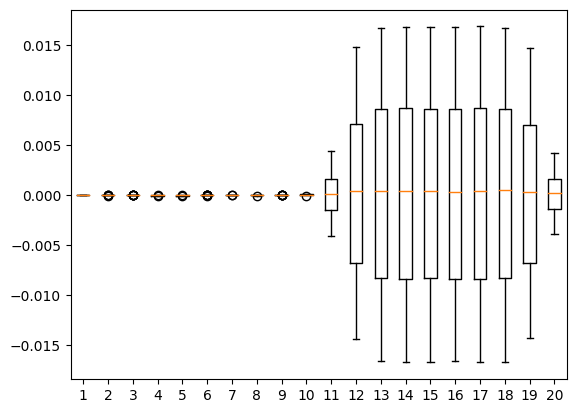

In [15]:
_ = plt.boxplot(df.iloc[:,:20], showfliers=True)

This is the second half.

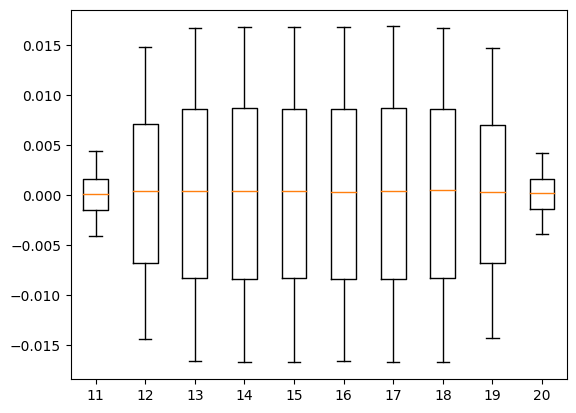

In [16]:
_ = plt.boxplot(df.iloc[:,10:20], showfliers=True, positions=np.arange(11,21,1))

This is the first entry in the dataset. Notice the difference between the first and second half of the pulses.

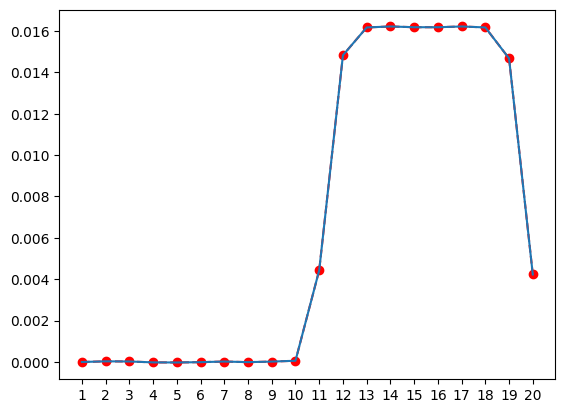

In [17]:
x = np.arange(1, 21, 1)
y = df.iloc[0:1,:20].to_numpy()[0]
plt.plot(x, y, marker='o', linestyle='--', color='r') 
plt.xticks(x, x)
plt.plot(x, y)
plt.show()

This is the second half of the (above) first entry in the dataset. The values are closer to zero than the first half.

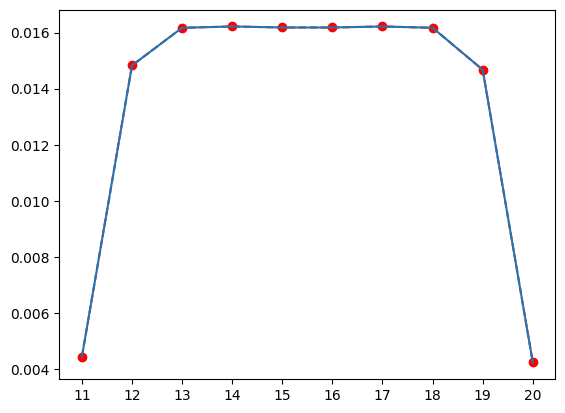

In [18]:
x = np.arange(11, 21, 1)
y = df.iloc[0:1,10:20].to_numpy()[0]
plt.plot(x, y, marker='o', linestyle='--', color='r') 
plt.xticks(x, x)
plt.plot(x, y)
plt.show()

Plot all of the entries in the dataset. Once again, only the first 10 elements (features) are significantly greater than zero.

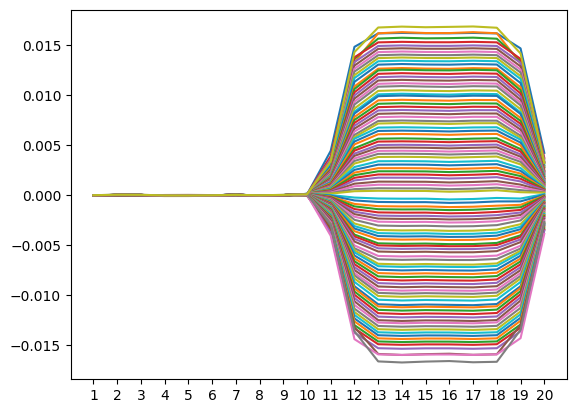

In [19]:
x = np.arange(1, 21, 1)
for i in range(df.shape[0]):
    y = df.iloc[i:i+1,:20].to_numpy()[0]
    plt.xticks(x, x)
    plt.plot(x, y)
plt.show()

Plot only the second half for all of the entries in the dataset.

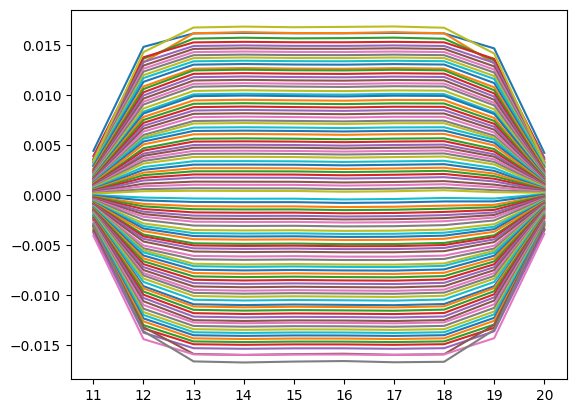

In [20]:
x = np.arange(11, 21, 1)
for i in range(df.shape[0]):
    y = df.iloc[i:i+1,10:20].to_numpy()[0]
    plt.xticks(x, x)
    plt.plot(x, y)
plt.show()

### Feature selection

Select the first 10 features (columns) in the dataset.

In [21]:
x_fs_train, x_fs_test, Y_fs_train, Y_fs_test = train_test_split(df.iloc[:,20], df.iloc[:,:10], test_size=0.2, random_state=1)
x_fs_train, x_fs_val, Y_fs_train, Y_fs_val = train_test_split(x_fs_train, Y_fs_train, test_size=0.25, random_state=1)

In [22]:
print('Train set (feature selection) shape: ', Y_fs_train.shape)
print('Validation set (feature selection) shape: ', Y_fs_val.shape)
print('Test set (feature selection) shape:  ', Y_fs_test.shape)

Train set (feature selection) shape:  (59, 10)
Validation set (feature selection) shape:  (20, 10)
Test set (feature selection) shape:   (20, 10)


In [23]:
import numpy as np
np.save('../data/appendix/' + problem + 'x_fs_train.npy', x_fs_train)
np.save('../data/appendix/' + problem + 'x_fs_val.npy', x_fs_val)
np.save('../data/appendix/' + problem + 'x_fs_test.npy', x_fs_test)
np.save('../data/appendix/' + problem + 'Y_fs_train.npy', Y_fs_train)
np.save('../data/appendix/' + problem + 'Y_fs_val.npy', Y_fs_val)
np.save('../data/appendix/' + problem + 'Y_fs_test.npy', Y_fs_test)

## ML Models

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import os

# Disable some console warnings
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

### α[20] ⇒ β 

In [25]:
prefix = '../model/appendix/' + problem + 'reverse_problem/'

#### Keras

##### Create model

Classical multi-layer perceptron: 20 (inputs)- 20 - 12 - 8 - 4 - 1 (output)

In [26]:
model = Sequential()
model.add(Dense(20, input_shape=(20,), name='fc1', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(12, name='fc2', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(8, name='fc3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(4, name='fc4', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu4'))
model.add(Dense(1, name='fc5', kernel_initializer='lecun_uniform'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 20)                420       
_________________________________________________________________
relu1 (Activation)           (None, 20)                0         
_________________________________________________________________
fc2 (Dense)                  (None, 12)                252       
_________________________________________________________________
relu2 (Activation)           (None, 12)                0         
_________________________________________________________________
fc3 (Dense)                  (None, 8)                 104       
_________________________________________________________________
relu3 (Activation)           (None, 8)                 0         
_________________________________________________________________
fc4 (Dense)                  (None, 4)                 3

In [28]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          20
               Dense   XXXXX -------------------       420    51.4%
                relu   #####          20
               Dense   XXXXX -------------------       252    30.8%
                relu   #####          12
               Dense   XXXXX -------------------       104    12.7%
                relu   #####           8
               Dense   XXXXX -------------------        36     4.4%
                relu   #####           4
               Dense   XXXXX -------------------         5     0.6%
                       #####           1


##### Training

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [30]:
best_model_file = prefix + '/best_keras_model.h5'
last_model_file = prefix + '/last_keras_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [31]:
train_and_save = False
history = None
if train_and_save:
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = model.fit(Y_train,
                        x_train,
                        epochs=5000,
                        validation_data=(Y_val, x_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    model.save(last_model_file)

Load the saved best model and use it from now on.

In [32]:
model = load_model(best_model_file)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

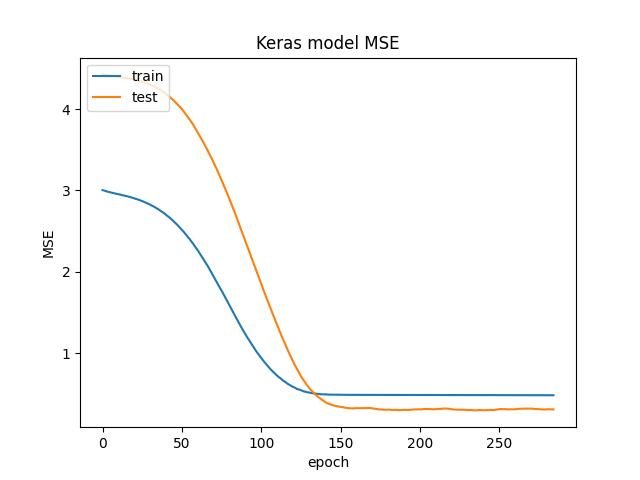

In [33]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='Keras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [34]:
mse, msle, mape = model.evaluate(Y_test, x_test)

1/1 [==============================] - 0s 78ms/step - loss: 0.0160 - mean_squared_logarithmic_error: 1.6791e-05 - mean_absolute_percentage_error: 3.9142


In [35]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["Keras", mse, msle, mape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

,,MSE,MSLE,MAPE
0,Keras,0.016021264717,0.000016790869,3.914155483246


Save metrics values to file for future reference.

In [36]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = False

In [37]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'Keras', mse, msle, mape)

In [39]:
from metrics import print_metrics
print_metrics(metrics_filename)

,Date,Framework,MSE,MSLE,MAPE
0,25/10/2022 10:40:14,Keras,0.016021264717,0.000016790869,3.914155483246


#### QAT/QKeras

##### Create model

As before, a classical multi-layer perceptron: 20 (inputs)- 20 - 12 - 8 - 4 - 1 (outputs).

In [40]:
import qkeras
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu

Remember that `ap_fixed<16, 8, true>` is `quantized_bits(bits=16,integer=7)`.

In [41]:
# Build quantized model
qmodel = tf.keras.models.Sequential()
qmodel.add(QDense(20,
                  input_shape=(20,),
                  name='fc1',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu1'))
qmodel.add(QDense(12,
                  name='fc2',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu2'))
qmodel.add(QDense(8,
                  name='fc3',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu3'))
qmodel.add(QDense(4,
                  name='fc4',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu4'))
qmodel.add(QDense(1,
                  name='fc5',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))

In [42]:
qmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (QDense)                 (None, 20)                420       
_________________________________________________________________
relu1 (QActivation)          (None, 20)                0         
_________________________________________________________________
fc2 (QDense)                 (None, 12)                252       
_________________________________________________________________
relu2 (QActivation)          (None, 12)                0         
_________________________________________________________________
fc3 (QDense)                 (None, 8)                 104       
_________________________________________________________________
relu3 (QActivation)          (None, 8)                 0         
_________________________________________________________________
fc4 (QDense)                 (None, 4)                

##### Training

In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [44]:
best_model_file = prefix + '/best_qkeras_model.h5'
last_model_file = prefix + '/last_qkeras_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [45]:
train_and_save = True
history = None
if train_and_save:
    qmodel.compile(optimizer=tf.optimizers.Adam(lr=0.1),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = qmodel.fit(Y_train,
                        x_train,
                        epochs=5000,
                        validation_data=(Y_val, x_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    qmodel.save(last_model_file)

Epoch 00095: early stopping


Load the saved best model and use it from now on.

In [46]:
co = {}
qkeras.utils._add_supported_quantized_objects(co)
qmodel = tf.keras.models.load_model(best_model_file, custom_objects=co)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

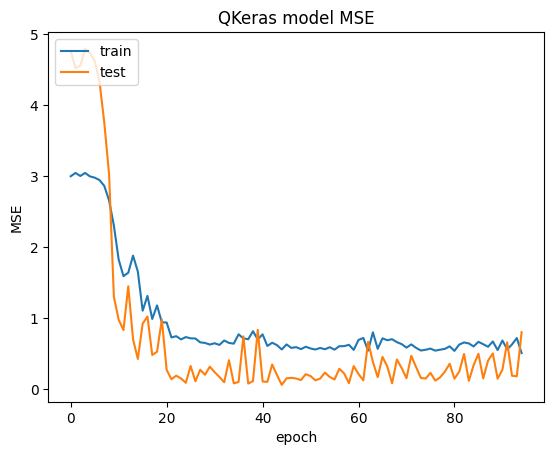

In [47]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='QKeras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [48]:
qmse, qmsle, qmape = qmodel.evaluate(Y_test, x_test)

1/1 [==============================] - 0s 159ms/step - loss: 0.0363 - mean_squared_logarithmic_error: 0.0039 - mean_absolute_percentage_error: 38.6961


In [49]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["QKeras", qmse, qmsle, qmape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

,,MSE,MSLE,MAPE
0,QKeras,0.036318581551,0.003948457539,38.696117401123


Save metrics values to file for future reference.

In [50]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = False

In [51]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'QKeras', qmse, qmsle, qmape)

In [52]:
from metrics import print_metrics
print_metrics(metrics_filename)

,Date,Framework,MSE,MSLE,MAPE
0,25/10/2022 10:40:14,Keras,0.016021264717,0.000016790869,3.914155483246
1,25/10/2022 10:44:46,QKeras,0.036318581551,0.003948457539,38.696117401123


#### hls4ml

##### Convert model

In [53]:
import hls4ml

/home/giuseppe/miniconda3/envs/ml4quantum-env/lib/python3.8/site-packages/hls4ml/converters/__init__.py:16: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [54]:
print('hls4ml ver.', hls4ml.__version__)

hls4ml ver. 0.6.0


In [55]:
hconfig = hls4ml.utils.config_from_keras_model(qmodel, granularity='name')

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: Input
Layer name: fc1, layer type: QDense
Layer name: relu1, layer type: QActivation
Layer name: fc2, layer type: QDense
Layer name: relu2, layer type: QActivation
Layer name: fc3, layer type: QDense
Layer name: relu3, layer type: QActivation
Layer name: fc4, layer type: QDense
Layer name: relu4, layer type: QActivation
Layer name: fc5, layer type: QDense


Show hls4ml configuration.

In [56]:
import plotting
plotting.print_dict(hconfig)

Model
  Precision:         ap_fixed<16,6>
  ReuseFactor:       1
  Strategy:          Latency
LayerName
  fc1_input
    Precision
      result:        ap_fixed<16,6>
  fc1
    Precision
      weight:        ap_fixed<16,8>
      bias:          ap_fixed<16,8>
    ReuseFactor:     1
  relu1
    Precision
      result:        ap_ufixed<16,7>
    ReuseFactor:     1
  fc2
    Precision
      weight:        ap_fixed<16,8>
      bias:          ap_fixed<16,8>
    ReuseFactor:     1
  relu2
    Precision
      result:        ap_ufixed<16,7>
    ReuseFactor:     1
  fc3
    Precision
      weight:        ap_fixed<16,8>
      bias:          ap_fixed<16,8>
    ReuseFactor:     1
  relu3
    Precision
      result:        ap_ufixed<16,7>
    ReuseFactor:     1
  fc4
    Precision
      weight:        ap_fixed<16,8>
      bias:          ap_fixed<16,8>
    ReuseFactor:     1
  relu4
    Precision
      result:        ap_ufixed<16,7>
    ReuseFactor:     1
  fc5
    Precision
      weight:        ap_fi

In [57]:
hmodel = hls4ml.converters.convert_from_keras_model(qmodel,
                                                    hls_config=hconfig,
                                                    output_dir=prefix+'hls4ml_prj',
                                                    part='XC7A100T')

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: fc1, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: relu1, layer type: Activation, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: fc2, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 12]
Layer name: relu2, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: fc3, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 8]
Layer name: relu3, layer type: Activation, input shapes: [[None, 8]], output shape: [None, 8]
Layer name: fc4, layer type: QDense, input shapes: [[None, 8]], output shape: [None, 4]
Layer name: relu4, layer type: Activation, input shapes: [[None, 4]], output shape: [None, 4]
Layer name: fc5, layer type: QDense, input shapes: [[None, 4]], output shape: [None, 1]
Creating HLS model


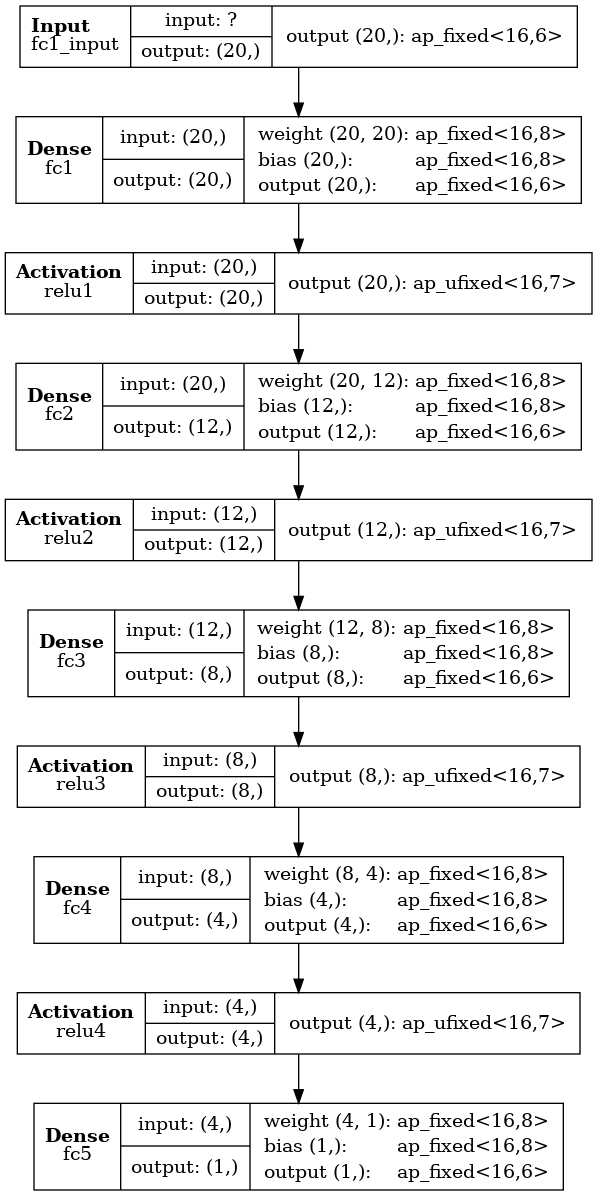

In [58]:
hls4ml.utils.plot_model(hmodel, show_shapes=True, show_precision=True, to_file=None)

In [59]:
hmodel.compile()

Writing HLS project
Done


##### Evaluation

In [60]:
import numpy as np

def hls4ml_evaluate_local(a, b):
    accum = 0
    accum = (a-b)**2
    return accum

def hls4ml_evaluate(model, x_test, Y_test):
    assert(len(x_test)==len(Y_test))
    N=len(x_test)
    accum = 0
    for i in range(N):
        expected = Y_test[i:i+1].to_numpy()[0]
        predicted = model.predict(np.ascontiguousarray(x_test.to_numpy()[i]))[0]
        accum += hls4ml_evaluate_local(expected, predicted)
    return accum / len(x_test)

In [61]:
hmse = hls4ml_evaluate(hmodel, Y_test, x_test)

In [62]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["hls4ml", hmse, "", ""]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

,,MSE,MSLE,MAPE
0,hls4ml,0.016632684576,,


Save metrics values to file for future reference.

In [63]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = False

In [64]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'hls4ml', hmse, "", "")

In [65]:
from metrics import print_metrics
print_metrics(metrics_filename)

,Date,Framework,MSE,MSLE,MAPE
0,25/10/2022 10:40:14,Keras,0.016021264717,0.000016790869,3.914155483246
1,25/10/2022 10:44:46,QKeras,0.036318581551,0.003948457539,38.696117401123
2,25/10/2022 10:50:42,hls4ml,0.016632684576,NaN,NaN


#### Comparison

In [66]:
x_keras = model.predict(Y_test)
x_qkeras = qmodel.predict(Y_test)
x_hls4ml = hmodel.predict(np.ascontiguousarray(np.array(Y_test.to_numpy())))

Plot and compare the Keras, QKeras, and hls4ml predictions with the reference in the dataset.

In [67]:
for i in range(len(x_test)):
    print(x_test.to_numpy().reshape(len(x_test),1)[i][0], " / ", x_keras[i][0], " / ", x_qkeras[i][0], " / ", x_hls4ml[i][0])

2.764601535159018  /  2.7628534  /  2.5556335  /  2.556640625
2.199114857512855  /  2.2099564  /  2.0422134  /  2.23828125
-1.0681415022205298  /  -1.0527747  /  -1.2925568  /  -1.1474609375
2.010619298297468  /  2.0367517  /  1.8650589  /  2.0498046875
1.884955592153876  /  1.877991  /  1.7026672  /  1.8134765625
-2.010619298297468  /  -1.8891785  /  -1.9995346  /  -1.9365234375
-0.8796459430051422  /  -0.8831526  /  -1.1285248  /  -0.96484375
2.073451151369264  /  2.0802612  /  1.9142685  /  2.0498046875
2.5132741228718345  /  2.5347648  /  2.3817596  /  2.453125
2.701769682087222  /  2.7022948  /  2.5556335  /  2.556640625
-0.2513274122871834  /  -0.2552411  /  -0.4855194  /  -0.404296875
-1.005309649148734  /  -0.99865174  /  -1.2417068  /  -1.1474609375
0.3769911184307751  /  0.37740484  /  0.16732788  /  0.3427734375
1.82212373908208  /  1.8162862  /  1.6386948  /  1.7216796875
0.8796459430051422  /  0.8934871  /  0.6922302  /  0.7490234375
-1.1309733552923256  /  -1.1351582  /  

In [68]:
print('Expected number of plots (test set size):', Y_test.shape[0])

Expected number of plots (test set size): 20


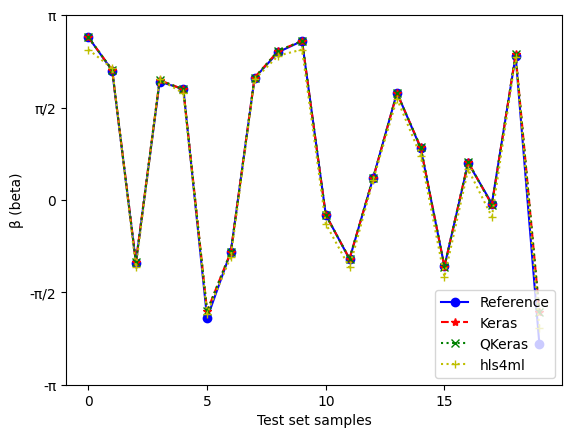

In [69]:
x_axis = np.arange(0, len(x_test), 1)
plt.clf()
plt.plot(x_axis, x_test.to_numpy(), marker='o', linestyle='-', color='b') 
plt.plot(x_axis, x_keras, marker='*', linestyle='--', color='r')
plt.plot(x_axis, x_keras, marker='x', linestyle=':', color='g')
plt.plot(x_axis, x_hls4ml, marker='+', linestyle=':', color='y')
plt.xticks(np.arange(0, len(x_test), 5), np.arange(0, len(x_test), 5))
pi = np.pi
y_axis = np.arange(-pi, pi + pi/2, step=(pi / 2))
plt.yticks(y_axis, ['-π', '-π/2', '0', 'π/2', 'π'])
plt.legend(['Reference', 'Keras', 'QKeras', 'hls4ml'], loc='lower right')
plt.xlabel('Test set samples')
plt.ylabel('β (beta)')
#plt.rcParams["figure.figsize"] = (20,5)
plt.show()

### β ⇒ α[20]

In [70]:
prefix = '../model/appendix/' + problem + 'forward_problem/'

#### Keras

##### Create model

Classical multi-layer perceptron: 1 (inputs)- 4 - 8 - 12 - 12 - 12 - 12 - 12 - 20 (outputs)

In [71]:
model = Sequential()
model.add(Dense(4, input_shape=(1,), name='fc1', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(8, name='fc2', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu2e'))
model.add(Dense(12, name='fc3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(12, name='fc4', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e'))
model.add(Dense(12, name='fc5', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e2'))
model.add(Dense(12, name='fc6', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e4'))
model.add(Dense(12, name='fc7', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e3'))
model.add(Dense(20, name='fc8', kernel_initializer='lecun_uniform'))

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 4)                 8         
_________________________________________________________________
relu1 (Activation)           (None, 4)                 0         
_________________________________________________________________
fc2 (Dense)                  (None, 8)                 40        
_________________________________________________________________
relu2e (Activation)          (None, 8)                 0         
_________________________________________________________________
fc3 (Dense)                  (None, 12)                108       
_________________________________________________________________
relu3 (Activation)           (None, 12)                0         
_________________________________________________________________
fc4 (Dense)                  (None, 12)               

In [73]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           1
               Dense   XXXXX -------------------         8     0.8%
                relu   #####           4
               Dense   XXXXX -------------------        40     3.8%
                relu   #####           8
               Dense   XXXXX -------------------       108    10.4%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       260    25.0%
                       #####          20


##### Training

In [74]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [75]:
best_model_file = prefix + '/best_keras_model.h5'
last_model_file = prefix + '/last_keras_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [76]:
train_and_save = False
history = None
if train_and_save:
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = model.fit(x_train,
                        Y_train,
                        epochs=5000,
                        validation_data=(x_val, Y_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    model.save(last_model_file)

Epoch 00604: early stopping


Load the saved best model and use it from now on.

In [77]:
model = load_model(best_model_file)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

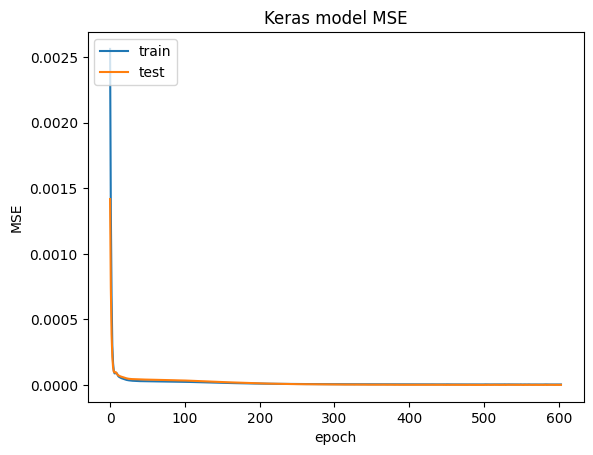

In [78]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='Keras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [79]:
mse, msle, mape = model.evaluate(x_test, Y_test)

1/1 [==============================] - 0s 70ms/step - loss: 3.9222e-07 - mean_squared_logarithmic_error: 1.4926e-07 - mean_absolute_percentage_error: 1869.9059


In [80]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["Keras", mse, msle, mape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

,,MSE,MSLE,MAPE
0,Keras,0.000000392217,0.000000149264,1869.905883789062


Save metrics values to file for future reference.

In [81]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = False

In [82]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'Keras', mse, msle, mape)

In [83]:
from metrics import print_metrics
print_metrics(metrics_filename)

,Date,Framework,MSE,MSLE,MAPE
0,25/10/2022 10:54:25,Keras,0.000000392217,0.000000149264,1869.905883789062


#### QAT/QKeras

##### Create model

As before, a classical multi-layer perceptron: 1 (inputs)- 4 - 8 - 12 - 12 - 12 - 12 - 20 (outputs).

In [84]:
import qkeras
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu

Remember that `ap_fixed<16, 8, true>` is `quantized_bits(bits=16,integer=7)`.

In [85]:
# Build quantized model
W=18
I=4

qmodel = tf.keras.models.Sequential()
qmodel.add(QDense(4,
                  input_shape=(1,),
                  name='fc1',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu1'))
qmodel.add(QDense(8,
                  name='fc2',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu2'))
qmodel.add(QDense(12,
                  name='fc3',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu3'))
qmodel.add(QDense(12,
                  name='fc4',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu4'))
qmodel.add(QDense(12,
                  name='fc5',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu5'))
qmodel.add(QDense(12,
                  name='fc6',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu6'))
qmodel.add(QDense(20,
                  name='fc7',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))

In [86]:
qmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (QDense)                 (None, 4)                 8         
_________________________________________________________________
relu1 (QActivation)          (None, 4)                 0         
_________________________________________________________________
fc2 (QDense)                 (None, 8)                 40        
_________________________________________________________________
relu2 (QActivation)          (None, 8)                 0         
_________________________________________________________________
fc3 (QDense)                 (None, 12)                108       
_________________________________________________________________
relu3 (QActivation)          (None, 12)                0         
_________________________________________________________________
fc4 (QDense)                 (None, 12)               

##### Training

In [87]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [88]:
best_model_file = prefix + '/best_qkeras_model.h5'
last_model_file = prefix + '/last_qkeras_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [89]:
train_and_save = False
history = None
if train_and_save:
    qmodel.compile(optimizer=tf.optimizers.Adam(lr=0.01),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = qmodel.fit(x_train,
                        Y_train,
                        epochs=5000,
                        validation_data=(x_val, Y_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    qmodel.save(last_model_file)

Epoch 00250: early stopping


Load the saved best model and use it from now on.

In [90]:
co = {}
qkeras.utils._add_supported_quantized_objects(co)
qmodel = tf.keras.models.load_model(best_model_file, custom_objects=co)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

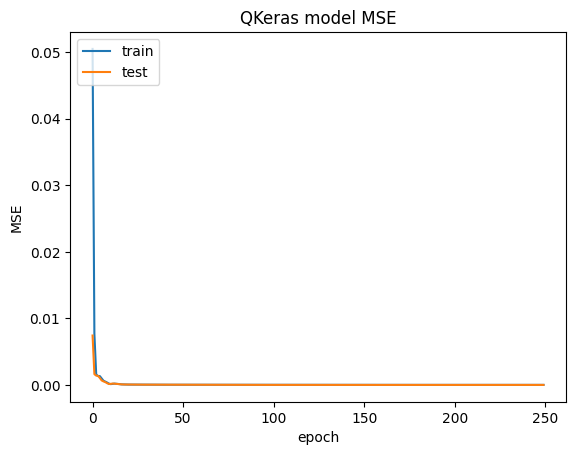

In [91]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='QKeras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [92]:
qmse, qmsle, qmape = qmodel.evaluate(x_test, Y_test)

1/1 [==============================] - 0s 217ms/step - loss: 7.7825e-07 - mean_squared_logarithmic_error: 2.0244e-08 - mean_absolute_percentage_error: 959.0270


Save metrics values to file for future reference.

In [93]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = False

In [94]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["QKeras", qmse, qmsle, qmape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

,,MSE,MSLE,MAPE
0,QKeras,0.000000778254,0.000000020244,959.026977539062


In [95]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'QKeras', qmse, qmsle, qmape)

In [96]:
from metrics import print_metrics
print_metrics(metrics_filename)

,Date,Framework,MSE,MSLE,MAPE
0,25/10/2022 10:54:25,Keras,0.000000392217,0.000000149264,1869.905883789062
1,25/10/2022 10:56:08,QKeras,0.000000778254,0.000000020244,959.026977539062


#### hls4ml

##### Convert model

In [97]:
import hls4ml

In [98]:
print('hls4ml ver.', hls4ml.__version__)

hls4ml ver. 0.6.0


In [99]:
hconfig = hls4ml.utils.config_from_keras_model(qmodel, granularity='name')
hconfig['Model']['Precision'] = 'ap_fixed<64,16>'
hconfig['LayerName']['fc1_input']['Precision']['result'] = 'ap_fixed<32,6>'
hconfig['LayerName']['fc1']['Precision']['result'] = 'ap_fixed<23,4>'
hconfig['LayerName']['relu1']['Precision']['result'] = 'ap_ufixed<22,3>'
hconfig['LayerName']['fc2']['Precision']['result'] = 'ap_fixed<23,4>'
hconfig['LayerName']['relu2']['Precision']['result'] = 'ap_ufixed<14,4>'
hconfig['LayerName']['fc3']['Precision']['result'] = 'ap_fixed<16,4>'
hconfig['LayerName']['relu3']['Precision']['result'] = 'ap_ufixed<16,4>'
hconfig['LayerName']['fc4']['Precision']['result'] = 'ap_fixed<24,4>'
hconfig['LayerName']['relu4']['Precision']['result'] = 'ap_ufixed<24,4>'
hconfig['LayerName']['fc5']['Precision']['result'] = 'ap_fixed<28,4>'
hconfig['LayerName']['relu5']['Precision']['result'] = 'ap_ufixed<28,4>'
hconfig['LayerName']['fc6']['Precision']['result'] = 'ap_fixed<28,4>'
hconfig['LayerName']['relu6']['Precision']['result'] = 'ap_ufixed<28,4>'
hconfig['LayerName']['fc7']['Precision']['result'] = 'ap_fixed<32,2>'

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: Input
Layer name: fc1, layer type: QDense
Layer name: relu1, layer type: QActivation
Layer name: fc2, layer type: QDense
Layer name: relu2, layer type: QActivation
Layer name: fc3, layer type: QDense
Layer name: relu3, layer type: QActivation
Layer name: fc4, layer type: QDense
Layer name: relu4, layer type: QActivation
Layer name: fc5, layer type: QDense
Layer name: relu5, layer type: QActivation
Layer name: fc6, layer type: QDense
Layer name: relu6, layer type: QActivation
Layer name: fc7, layer type: QDense


Show hls4ml configuration.

In [100]:
import plotting
plotting.print_dict(hconfig)

Model
  Precision:         ap_fixed<64,16>
  ReuseFactor:       1
  Strategy:          Latency
LayerName
  fc1_input
    Precision
      result:        ap_fixed<32,6>
  fc1
    Precision
      weight:        ap_fixed<18,4>
      bias:          ap_fixed<18,4>
      result:        ap_fixed<23,4>
    ReuseFactor:     1
  relu1
    Precision
      result:        ap_ufixed<22,3>
    ReuseFactor:     1
  fc2
    Precision
      weight:        ap_fixed<18,4>
      bias:          ap_fixed<18,4>
      result:        ap_fixed<23,4>
    ReuseFactor:     1
  relu2
    Precision
      result:        ap_ufixed<14,4>
    ReuseFactor:     1
  fc3
    Precision
      weight:        ap_fixed<18,4>
      bias:          ap_fixed<18,4>
      result:        ap_fixed<16,4>
    ReuseFactor:     1
  relu3
    Precision
      result:        ap_ufixed<16,4>
    ReuseFactor:     1
  fc4
    Precision
      weight:        ap_fixed<18,4>
      bias:          ap_fixed<18,4>
      result:        ap_fixed<24,4>
    Re

In [101]:
hmodel = hls4ml.converters.convert_from_keras_model(qmodel,
                                                    hls_config=hconfig,
                                                    output_dir=prefix+'hls4ml_prj',
                                                    part='xczu3eg-sbva484-1-e')
                                                    #part='xc7a100t-csg324-3')

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: fc1, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 4]
Layer name: relu1, layer type: Activation, input shapes: [[None, 4]], output shape: [None, 4]
Layer name: fc2, layer type: QDense, input shapes: [[None, 4]], output shape: [None, 8]
Layer name: relu2, layer type: Activation, input shapes: [[None, 8]], output shape: [None, 8]
Layer name: fc3, layer type: QDense, input shapes: [[None, 8]], output shape: [None, 12]
Layer name: relu3, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: fc4, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: relu4, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: fc5, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: relu5, layer type: Activation, 

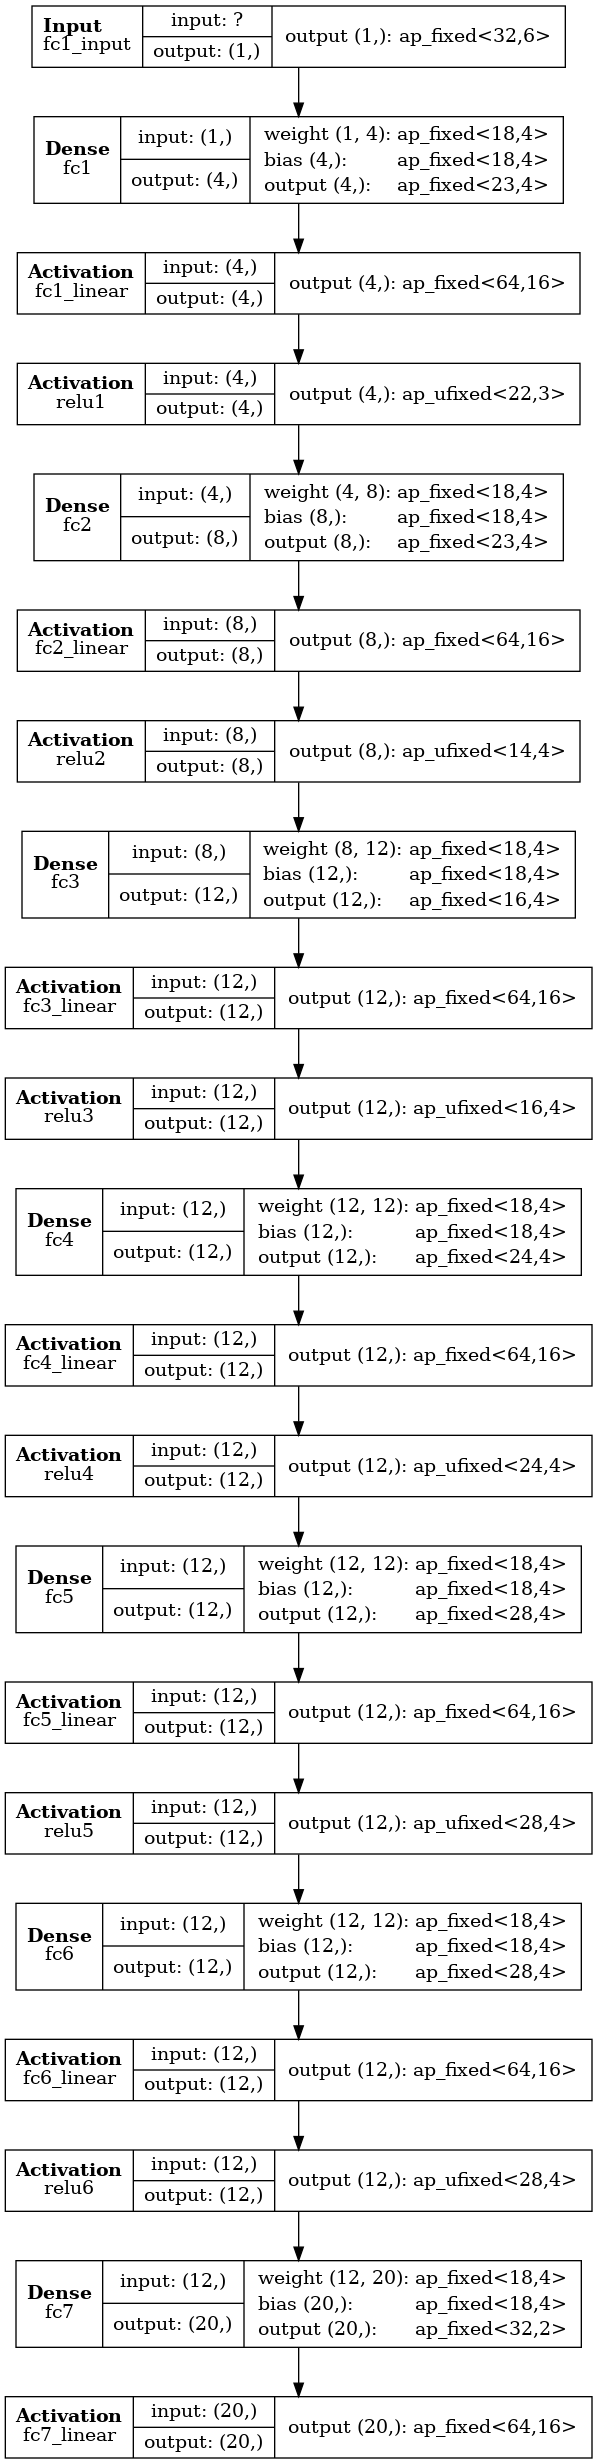

In [102]:
hls4ml.utils.plot_model(hmodel, show_shapes=True, show_precision=True, to_file=None)

In [103]:
hmodel.compile()

Writing HLS project
Done


##### Tracing and debugging

##### Evaluation

In [104]:
from metrics import hls4ml_evaluate

In [105]:
hmse = hls4ml_evaluate(hmodel, x_test, Y_test)

In [106]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["hls4ml", hmse, "", ""]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

,,MSE,MSLE,MAPE
0,hls4ml,0.000000779590,,


Save metrics values to file for future reference.

In [110]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = False

In [111]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'hls4ml', hmse, "", "")

In [112]:
from metrics import print_metrics
print_metrics(metrics_filename)

,Date,Framework,MSE,MSLE,MAPE
0,25/10/2022 10:54:25,Keras,0.000000392217,0.000000149264,1869.905883789062
1,25/10/2022 10:56:08,QKeras,0.000000778254,0.000000020244,959.026977539062
2,25/10/2022 12:30:32,hls4ml,0.000000779590,NaN,NaN


#### Comparison

In [113]:
Y_keras = model.predict(x_test)
Y_qkeras = qmodel.predict(x_test)
Y_hls4ml = hmodel.predict(np.array(x_test.to_numpy()).reshape((len(x_test), 1)))

Plot and compare the Keras, QKeras, and hls4ml predictions with the reference in the dataset.

In [114]:
print('Expected number of plots (test set size):', Y_test.shape[0])

Expected number of plots (test set size): 20


Test # 0


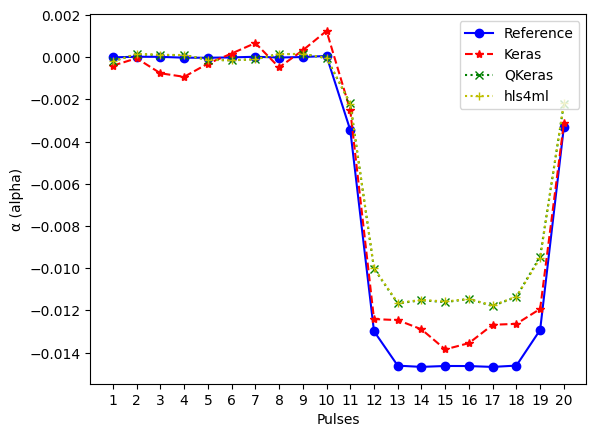

Test # 1


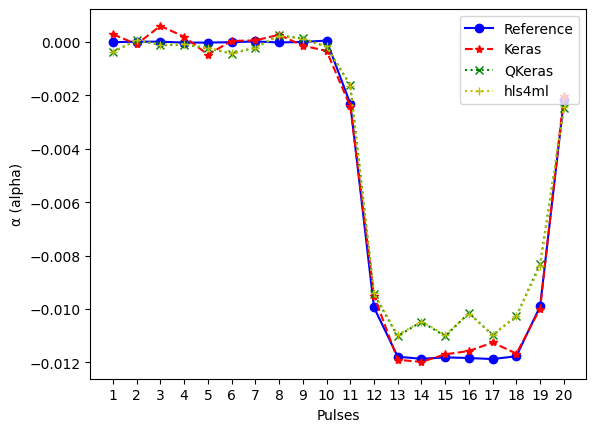

Test # 2


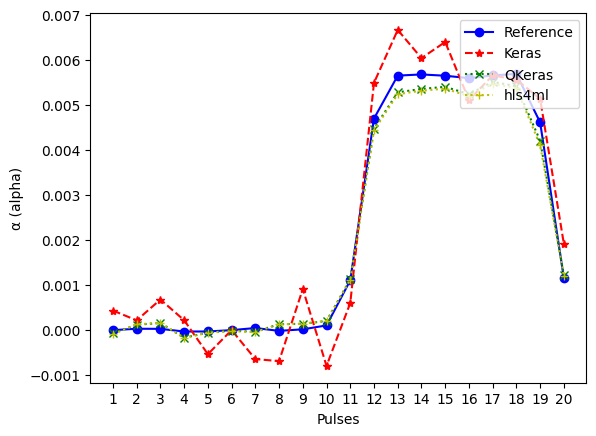

Test # 3


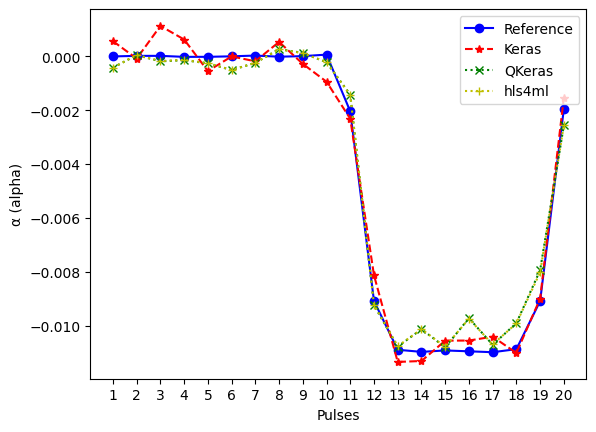

Test # 4


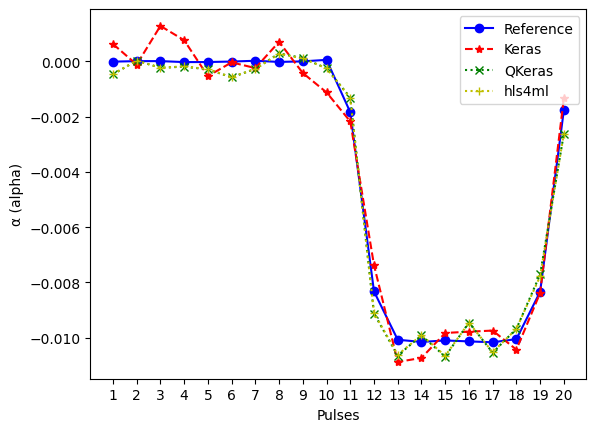

Test # 5


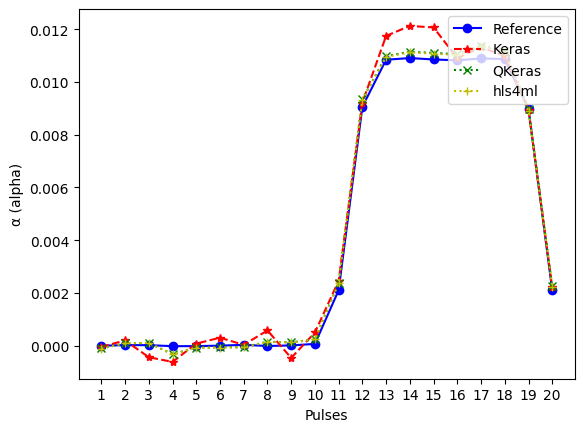

Test # 6


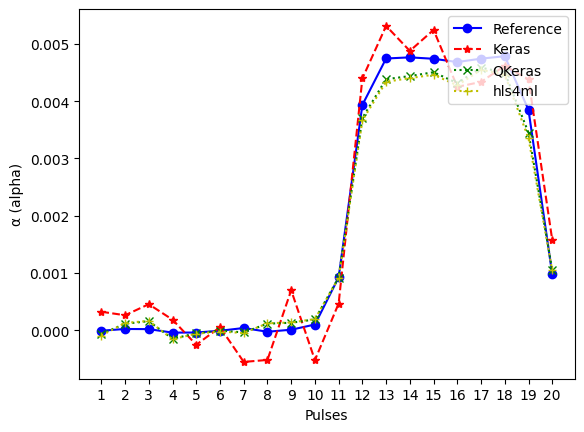

Test # 7


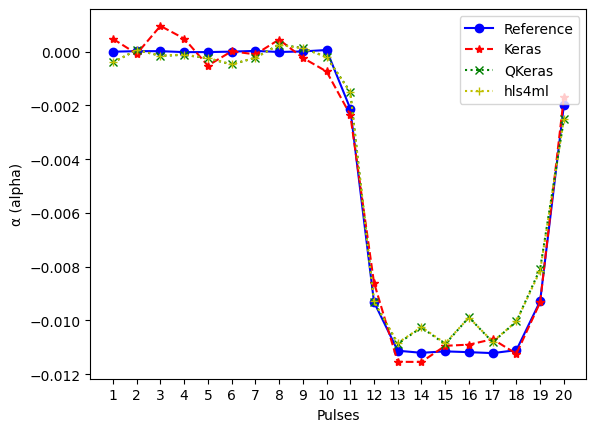

Test # 8


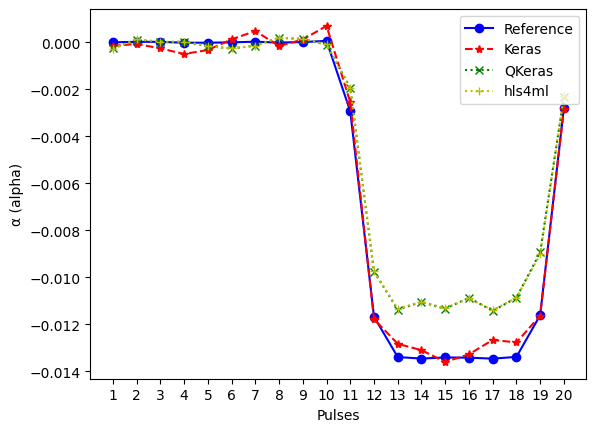

Test # 9


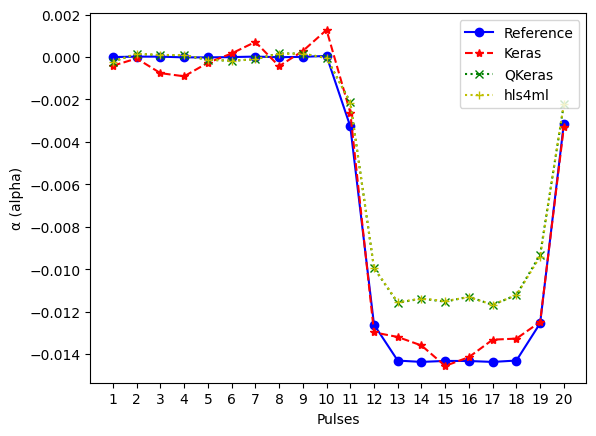

Test # 10


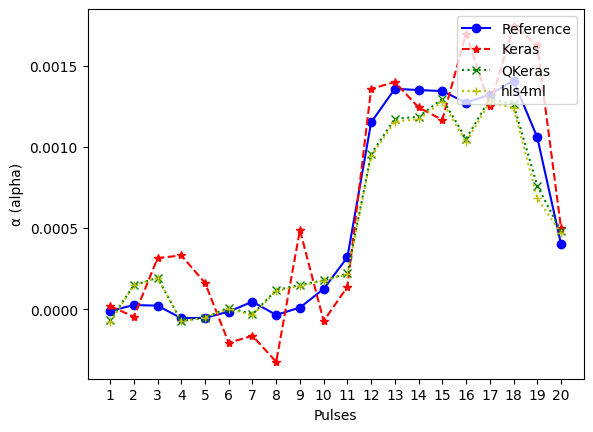

Test # 11


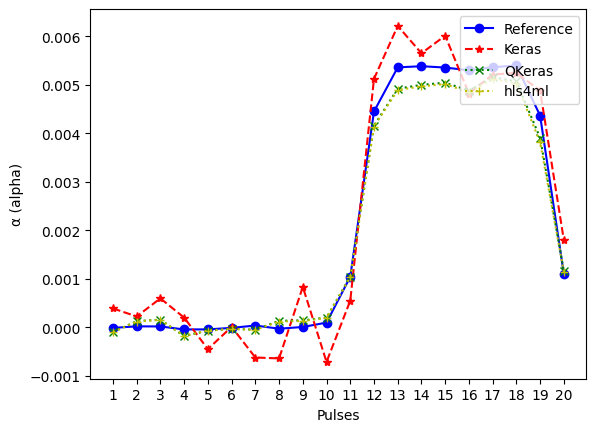

Test # 12


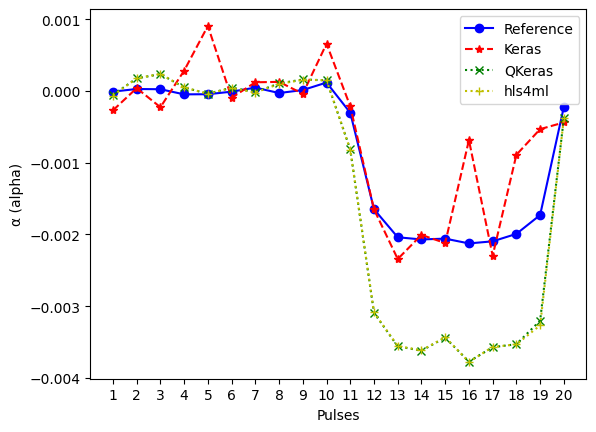

Test # 13


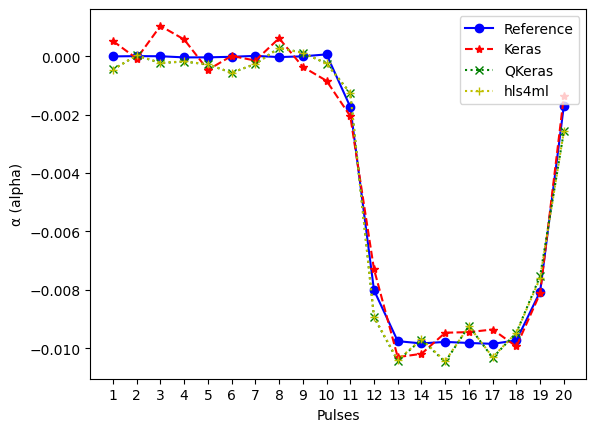

Test # 14


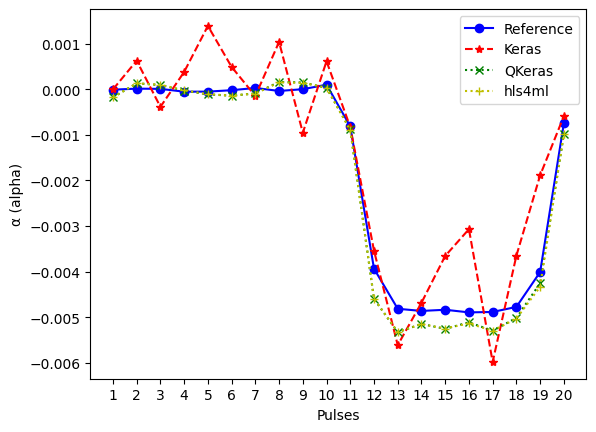

Test # 15


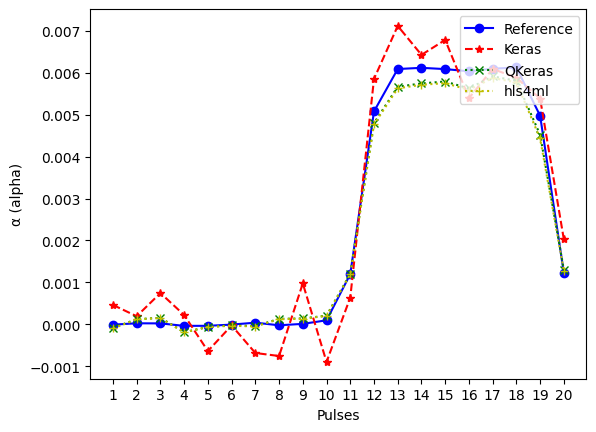

Test # 16


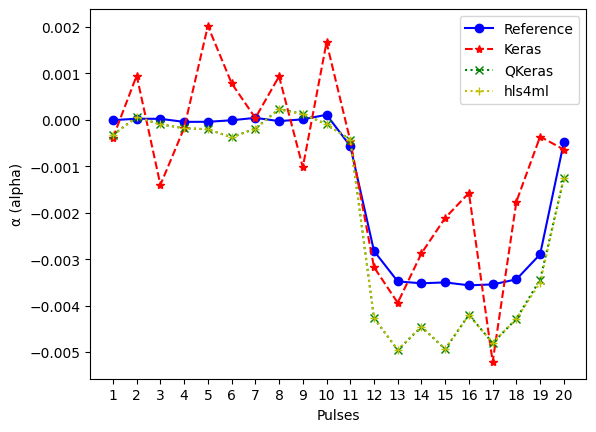

Test # 17


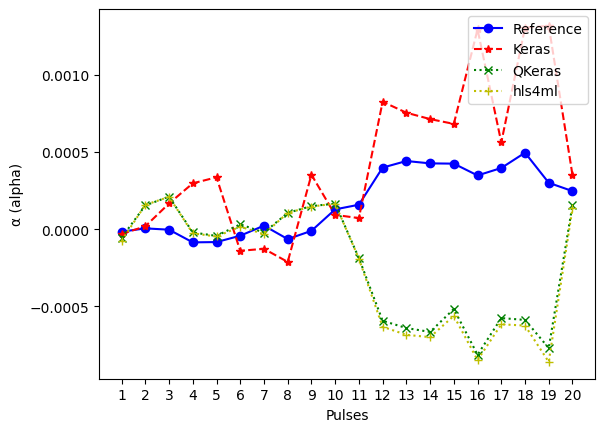

Test # 18


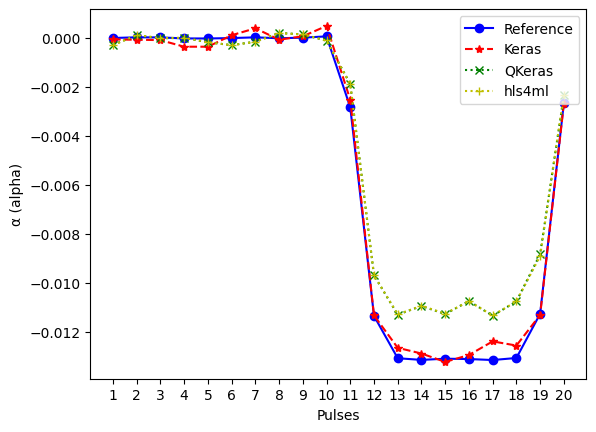

Test # 19


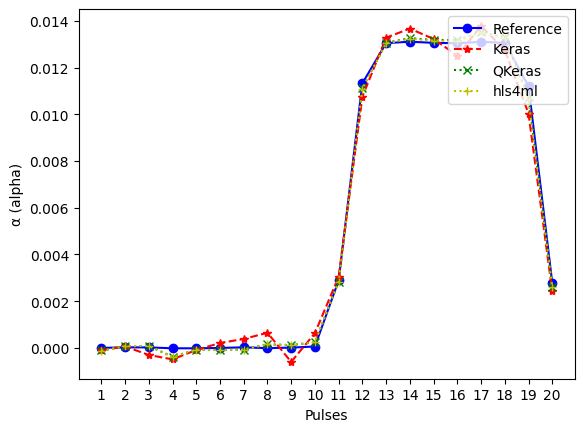

In [115]:
x = np.arange(1, Y_test.shape[1]+1, 1)
for i in range(Y_test.shape[0]):
    print('Test #', i)
    plt.clf()
    #plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(x, Y_test.to_numpy()[i], marker='o', linestyle='-', color='b') 
    plt.plot(x, Y_keras[i], marker='*', linestyle='--', color='r')
    plt.plot(x, Y_qkeras[i], marker='x', linestyle=':', color='g')
    plt.plot(x, Y_hls4ml[i], marker='+', linestyle=':', color='y')
    plt.xticks(x, x)
    plt.legend(['Reference', 'Keras', 'QKeras','hls4ml'], loc='upper right')
    plt.ylabel('α (alpha)')
    plt.xlabel('Pulses')
    plt.show()

#### Hardware

In [116]:
%%time
results = hmodel.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.1 (64-bit)
  **** SW Build 2552052 on Fri May 24 14:47:09 MDT 2019
  **** IP Build 2548770 on Fri May 24 18:01:18 MDT 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2019.1/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2019.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'giuseppe' on host 'thorin' (Linux_x86_64 version 5.14.0-1048-oem) on Tue Oct 25 12:31:00 PDT 2022
INFO: [HLS 200-10] On os Ubuntu 22.04.1 LTS
INFO: [HLS 200-10] In directory '/home/giuseppe/research/projects/quantum/ml4quantum-release/model/appendix/yrotate_forward_problem/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Creating and opening project '/home/giuseppe/research/projects/quantum/ml4quantum-release/model/appendix/yrotate_forward_problem/hls4ml_prj/myproject_prj'.


INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:15) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::expv' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:18) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::__signbit' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:59) automatically.
INFO: [XFORM 203-602] Inlining function 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' into 'generic_cast_IEEE754<int, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/Float

INFO: [HLS 200-489] Unrolling loop 'Accum1' (firmware/nnet_utils/nnet_dense_latency.h:109) in function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config17>' completely with a factor of 12.
INFO: [HLS 200-489] Unrolling loop 'Accum2' (firmware/nnet_utils/nnet_dense_latency.h:113) in function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config17>' completely with a factor of 12.
INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_dense_latency.h:120) in function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config17>' completely with a factor of 12.
INFO: [HLS 200-489] Unrolling loop 'Loop-1' (firmware/nnet_utils/nnet_activation.h:76) in function 'nnet::relu<ap_fixed<64, 16, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>,

INFO: [XFORM 203-131] Reshaping array 'fc1_input.V' (firmware/myproject.cpp:25) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer21_out.V' (firmware/myproject.cpp:26) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer2_out.V' (firmware/myproject.cpp:68) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer3_out.V' (firmware/myproject.cpp:72) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer4_out.V' (firmware/myproject.cpp:76) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer5_out.V' (firmware/myproject.cpp:80) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer6_out.V' (firmware/myproject.cpp:84) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer7_out.V' (firmware/myproject.cpp:88) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'layer8_out.V' (firmware/myproject.cpp:92) in dimension 1 completely.
INFO

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>'(firmware/nnet_utils/nnet_mult.h:45:9) to 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:142) by setting 'weights.V' to 'w20.V'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0'(firmware/nnet_utils/nnet_mult.h:45:9) to 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<32, 2, (ap_q_mode)5, (ap_o_mode)3, 0>, config20>.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:142) by setting 'biases[0].V' to 'b20.V.0'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufi

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config17>.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_mult.h:45:9) to 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config17>.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:130) by setting 'biases[10].V' to 'b17.V.10'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config17>.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_mult.h:45:9) to 'nnet::dense_latency<ap_ufixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<28, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config17>.0.0.0.0.0.0.0.0.0.0.0.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:130) by setting 'biase

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<22, 3, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<23, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config5>.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:45:1) to 'nnet::dense_latency<ap_ufixed<22, 3, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<23, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config5>.0.0.0.0.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:82) by setting 'biases[4].V' to 'b5.V.4'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_ufixed<22, 3, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<23, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config5>.0.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:45:1) to 'nnet::dense_latency<ap_ufixed<22, 3, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<23, 4, (ap_q_mode)5, (ap_o_mode)3, 0>, config5>.0.0.0.0.0.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/myproject.cpp:82) by setting 'biases[5].V' to 'b5.V.5'.
INFO: [XFORM 203-6

INFO: [HLS 200-111] Finished Architecture Synthesis Time (s): cpu = 00:00:23 ; elapsed = 00:00:24 . Memory (MB): peak = 1221.152 ; gain = 502.168 ; free physical = 24146 ; free virtual = 44725
INFO: [HLS 200-10] Starting hardware synthesis ...
INFO: [HLS 200-10] Synthesizing 'myproject' ...
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'dense_latency_ap_fixed_ap_fixed_config2_0_0_0_0_0' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining function 'dense_latency<ap_fixed,ap_fixed,config2>.0.0.0.0.0'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 2.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 24.06 seconds; current allocated memory: 478.676 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performin

INFO: [SCHED 204-61] Pipelining function 'dense_latency.0.0.0.0.0.0.0.0.0.0.0.0.0.3'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 2.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.21 seconds; current allocated memory: 482.717 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Starting global binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.25 seconds; current allocated memory: 485.104 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'linear_ap_fixed_ap_fixed_64_16_5_3_0_linear_config9_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting sche

INFO: [SCHED 204-61] Pipelining function 'dense_latency.0.0.0.0.0.0.0.0.0.0.0.0.0'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 3.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.24 seconds; current allocated memory: 503.200 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Starting global binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.41 seconds; current allocated memory: 507.353 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'linear_ap_fixed_ap_fixed_64_16_5_3_0_linear_config18_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting sched

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'linear_ap_fixed_ap_fixed_64_16_5_3_0_linear_config9_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'linear_ap_fixed_ap_fixed_64_16_5_3_0_linear_config9_s'.
INFO: [HLS 200-111]  Elapsed time: 0.53 seconds; current allocated memory: 546.545 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_ap_fixed_ap_ufixed_16_4_5_3_0_relu_config10_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_ap_fixed_ap_ufixed_16_4_5_3_0_relu_config10_s'.
INFO: [HLS 200-111]  Elapsed time: 0.1 seconds; current allocated memory: 547.931 MB.
INFO: [HLS 200-10] ----------------------------------------------

INFO: [HLS 200-111] Finished generating all RTL models Time (s): cpu = 00:00:40 ; elapsed = 00:00:43 . Memory (MB): peak = 1349.152 ; gain = 630.168 ; free physical = 23960 ; free virtual = 44566
INFO: [VHDL 208-304] Generating VHDL RTL for myproject.
INFO: [VLOG 209-307] Generating Verilog RTL for myproject.
***** C/RTL SYNTHESIS COMPLETED IN 0h0m42s *****
INFO: [HLS 200-112] Total elapsed time: 43.07 seconds; peak allocated memory: 635.166 MB.
INFO: [Common 17-206] Exiting vivado_hls at Tue Oct 25 12:31:43 2022...
CPU times: user 36.1 ms, sys: 40.9 ms, total: 77 ms
Wall time: 44.5 s


In [118]:
print('-----------------------------------')
#print(results) # Print hashmap
hls_results=results
#['CSynthesisReport'] 
print("Estimated Clock Period: {} ns".format(hls_results['EstimatedClockPeriod']))
print("Best/Worst Latency:     {} / {}".format(hls_results['BestLatency'], hls_results['WorstLatency']))
print("Interval Min/Max:       {} / {}".format(hls_results['IntervalMin'], hls_results['IntervalMax']))
print("BRAM_18K:               {}, {:0.1f}% (Aval. {})".format(hls_results['BRAM_18K'], int(hls_results['BRAM_18K'])*100.0/int(hls_results['AvailableBRAM_18K']), hls_results['AvailableBRAM_18K']))
print("DSP48E:                 {}, {:0.1f}% (Aval. {})".format(hls_results['DSP48E'], int(hls_results['DSP48E'])*100.0/int(hls_results['AvailableDSP48E']), hls_results['AvailableDSP48E']))
print("FF:                     {}, {:0.1f}% (Aval. {})".format(hls_results['FF'], int(hls_results['FF'])*100.0/int(hls_results['AvailableFF']), hls_results['AvailableFF']))
print("LUT:                    {}, {:0.1f}% (Aval. {})".format(hls_results['LUT'], int(hls_results['LUT'])*100.0/int(hls_results['AvailableLUT']), hls_results['AvailableLUT']))
#print("URAM:                   {}, {} (Aval. {})".format(hls_results['URAM'], int(hls_results['URAM'])*100.0/int(hls_results['AvailableURAM']), hls_results['AvailableURAM']))
print('-----------------------------------')

-----------------------------------
Estimated Clock Period: 4.356 ns
Best/Worst Latency:     24 / 24
Interval Min/Max:       1 / 1
BRAM_18K:               0, 0.0% (Aval. 432)
DSP48E:                 1145, 318.1% (Aval. 360)
FF:                     29911, 21.2% (Aval. 141120)
LUT:                    69474, 98.5% (Aval. 70560)
-----------------------------------


In [ ]:
from metrics import write_hls_report

hls_report_file = prefix + 'forward_problem_hls_report.csv'
write_hls_report(hls_report_file, hls_results)

In [ ]:
from metrics import print_hls_report
print_hls_report(hls_report_file)

### β ⇒ α[10]

In [ ]:
prefix = '../model/appendix/' + problem + 'fs_forward_problem/'

#### Keras

##### Create model

Classical multi-layer perceptron: 1 (inputs)- 4 - 6 - 8 - 10 (outputs)

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(1,), name='fc1', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(6, name='fc2', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(8, name='fc3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(10, name='fc4', kernel_initializer='lecun_uniform'))

In [ ]:
model.summary()

In [ ]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

##### Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
best_model_file = prefix + '/best_keras_fs_model.h5'
last_model_file = prefix + '/last_keras_fs_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [ ]:
train_and_save = False
history = None
if train_and_save:
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = model.fit(x_fs_train,
                        Y_fs_train,
                        epochs=5000,
                        validation_data=(x_fs_val, Y_fs_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    model.save(last_model_file)

Load the saved best model and use it from now on.

In [ ]:
model = load_model(best_model_file)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

In [ ]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='Keras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [ ]:
mse, msle, mape = model.evaluate(x_fs_test, Y_fs_test)

In [ ]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["Keras", mse, msle, mape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

Save metrics values to file for future reference.

In [ ]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = True

In [ ]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'Keras', mse, msle, mape)

In [ ]:
from metrics import print_metrics
print_metrics(metrics_filename)

#### QAT/QKeras

##### Create model

As before, a classical multi-layer perceptron: 1 (inputs)- 4 - 6 - 8 - 10 (outputs).

In [ ]:
import qkeras
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu

Remember that `ap_fixed<16, 8, true>` is `quantized_bits(bits=16,integer=7)`.

In [ ]:
# Build quantized model
W=22
I=6

qmodel = tf.keras.models.Sequential()
qmodel.add(QDense(4,
                  input_shape=(1,),
                  name='fc1',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu1'))
qmodel.add(QDense(6,
                  input_shape=(1,),
                  name='fc2',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu2'))
qmodel.add(QDense(8,
                  name='fc3',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu3'))
qmodel.add(QDense(10,
                  name='fc4',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))

In [ ]:
qmodel.summary()

##### Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
best_model_file = prefix + '/best_qkeras_fs_model.h5'
last_model_file = prefix + '/last_qkeras_fs_model.h5'

Enable training (`train_and_save`) to overwrite the model file. We use Adam optimizer, minimize the Mean Squared Error, and early stop.

In [ ]:
train_and_save = False
history = None
if train_and_save:
    qmodel.compile(optimizer=tf.optimizers.Adam(lr=0.01),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=50,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath=best_model_file,
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = qmodel.fit(x_fs_train,
                        Y_fs_train,
                        epochs=5000,
                        validation_data=(x_fs_val, Y_fs_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    qmodel.save(last_model_file)

Load the saved best model and use it from now on.

In [ ]:
co = {}
qkeras.utils._add_supported_quantized_objects(co)
qmodel = tf.keras.models.load_model(best_model_file, custom_objects=co)

##### Evaluation

Although we may plot and print many metrics, we focus only on **Mean Squared Error (MSE).**

Plot training history.

In [ ]:
from metrics import plot_metrics
plot_metrics(prefix,
             framework='QKeras',
             save=train_and_save,
             show_all=False, # show MSLE and MAPE, in addition to MSE
             history=history)

Print metrics.

In [ ]:
qmse, qmsle, qmape = qmodel.evaluate(x_fs_test, Y_fs_test)

Save metrics values to file for future reference.

In [ ]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = True

In [ ]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["QKeras", qmse, qmsle, qmape]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

In [ ]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'QKeras', qmse, qmsle, qmape)

In [ ]:
from metrics import print_metrics
print_metrics(metrics_filename)

#### hls4ml

##### Convert model

In [ ]:
import hls4ml

In [ ]:
print('hls4ml ver.', hls4ml.__version__)

In [ ]:
hconfig = hls4ml.utils.config_from_keras_model(qmodel, granularity='name')
hconfig['Model']['Precision'] = 'ap_fixed<32,6>'
hconfig['LayerName']['fc1_input']['Precision']['result'] = 'ap_fixed<20,3>'
hconfig['LayerName']['fc1']['Precision']['result'] = 'ap_fixed<22,4>'
hconfig['LayerName']['relu1']['Precision']['result'] = 'ap_ufixed<22,4>'
hconfig['LayerName']['fc2']['Precision']['result'] = 'ap_fixed<22,4>'
hconfig['LayerName']['relu2']['Precision']['result'] = 'ap_ufixed<22,4>'
hconfig['LayerName']['fc3']['Precision']['result'] = 'ap_fixed<32,4>'
hconfig['LayerName']['relu3']['Precision']['result'] = 'ap_ufixed<22,4>'
hconfig['LayerName']['fc4']['Precision']['result'] = 'ap_fixed<28,3>'

Enable tracing for all of the layers

In [ ]:
for layer in hconfig['LayerName'].keys():
    print('Enable tracing for layer:', layer)
    hconfig['LayerName'][layer]['Trace'] = True

Show hls4ml configuration.

In [ ]:
import plotting
plotting.print_dict(hconfig)

In [ ]:
hmodel = hls4ml.converters.convert_from_keras_model(qmodel,
                                                    hls_config=hconfig,
                                                    output_dir=prefix+'hls4ml_prj',
                                                    part='xczu3eg-sbva484-1-e')
                                                    #part='xc7a100t-csg324-3')

In [ ]:
hls4ml.utils.plot_model(hmodel, show_shapes=True, show_precision=True, to_file=None)

In [ ]:
hmodel.compile()

##### Tracing and debugging

In [ ]:
# Run profiling
_ = hls4ml.model.profiling.numerical(model=qmodel, hls_model=hmodel, X=x_fs_test)

##### Evaluation

In [ ]:
from metrics import hls4ml_evaluate

In [ ]:
hmse = hls4ml_evaluate(hmodel, x_fs_test, Y_fs_test)

In [ ]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["hls4ml", hmse, "", ""]], columns=["", "MSE", "MSLE", "MAPE"])
    display(data)

Save metrics values to file for future reference.

In [ ]:
metrics_filename = prefix + '/metrics.csv'

# You can disable the writing if necessary.
write_metrics_csv = True

In [ ]:
from metrics import write_metrics
if write_metrics_csv:
    write_metrics(metrics_filename, 'hls4ml', hmse, "", "")

In [ ]:
from metrics import print_metrics
print_metrics(metrics_filename)

#### Comparison

In [ ]:
Y_keras = model.predict(x_fs_test)
Y_qkeras = qmodel.predict(x_fs_test)
Y_hls4ml = hmodel.predict(np.array(x_fs_test.to_numpy()).reshape((len(x_test), 1)))

Plot and compare the Keras, QKeras, and hls4ml predictions with the reference in the dataset.

In [ ]:
print('Expected number of plots (test set size):', Y_test.shape[0])

In [ ]:
x = np.arange(1, Y_fs_test.shape[1]+1, 1)
for i in range(Y_fs_test.shape[0]):
    print('Test #', i)
    plt.clf()
    #plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(x, Y_fs_test.to_numpy()[i], marker='o', linestyle='-', color='b') 
    plt.plot(x, Y_keras[i], marker='*', linestyle='--', color='r')
    plt.plot(x, Y_qkeras[i], marker='x', linestyle=':', color='g')
    plt.plot(x, Y_hls4ml[i], marker='+', linestyle=':', color='y')
    plt.xticks(x, x)
    plt.legend(['Reference', 'Keras', 'QKeras','hls4ml'], loc='upper right')
    plt.ylabel('α (alpha)')
    plt.xlabel('Pulses')
    plt.show()

#### Hardware

In [ ]:
%%time
results = hmodel.build(csim=False)

In [ ]:
print('-----------------------------------')
#print(results) # Print hashmap
hls_results=results['CSynthesisReport'] 
print("Estimated Clock Period: {} ns".format(hls_results['EstimatedClockPeriod']))
print("Best/Worst Latency:     {} / {}".format(hls_results['BestLatency'], hls_results['WorstLatency']))
print("Interval Min/Max:       {} / {}".format(hls_results['IntervalMin'], hls_results['IntervalMax']))
print("BRAM_18K:               {}, {:0.1f}% (Aval. {})".format(hls_results['BRAM_18K'], int(hls_results['BRAM_18K'])*100.0/int(hls_results['AvailableBRAM_18K']), hls_results['AvailableBRAM_18K']))
print("DSP48E:                 {}, {:0.1f}% (Aval. {})".format(hls_results['DSP48E'], int(hls_results['DSP48E'])*100.0/int(hls_results['AvailableDSP48E']), hls_results['AvailableDSP48E']))
print("FF:                     {}, {:0.1f}% (Aval. {})".format(hls_results['FF'], int(hls_results['FF'])*100.0/int(hls_results['AvailableFF']), hls_results['AvailableFF']))
print("LUT:                    {}, {:0.1f}% (Aval. {})".format(hls_results['LUT'], int(hls_results['LUT'])*100.0/int(hls_results['AvailableLUT']), hls_results['AvailableLUT']))
#print("URAM:                   {}, {} (Aval. {})".format(hls_results['URAM'], int(hls_results['URAM'])*100.0/int(hls_results['AvailableURAM']), hls_results['AvailableURAM']))
print('-----------------------------------')

In [ ]:
from metrics import write_hls_report

hls_report_file = prefix + 'fs_forward_problem_hls_report.csv'
write_hls_report(hls_report_file, hls_results)

In [ ]:
from metrics import print_hls_report
print_hls_report(hls_report_file)